## Importando librerías

In [ ]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np

https://keras.io/api/datasets/reuters/

## Descarguemos datos

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### Diccionario de palabras

In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
for _ in train_data[0]:
    print(word_index.get( _ - 3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


### Función de vectorizar 

In [ ]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults     

## Transformando los datos

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [ ]:
train_labels[0]

3

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Creando la red

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

### Entrenando el modelo

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 63us/step - loss: 2.7215 - acc: 0.4431 - val_loss: 1.8091 - val_acc: 0.6020
Epoch 2/9
7982/7982 [==============================] - 0s 37us/step - loss: 1.4649 - acc: 0.6963 - val_loss: 1.3220 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 0s 36us/step - loss: 1.0608 - acc: 0.7803 - val_loss: 1.1254 - val_acc: 0.7650
Epoch 4/9
7982/7982 [==============================] - 0s 49us/step - loss: 0.8237 - acc: 0.8301 - val_loss: 1.0230 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.6544 - acc: 0.8613 - val_loss: 0.9593 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 0s 49us/step - loss: 0.5223 - acc: 0.8914 - val_loss: 0.9211 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 0s 50us/step - loss: 0.4207 - acc: 0.9094 - val_loss: 0.9145 - val_acc: 0.7980
Epoch 8/9
7982

### Validamos resultados

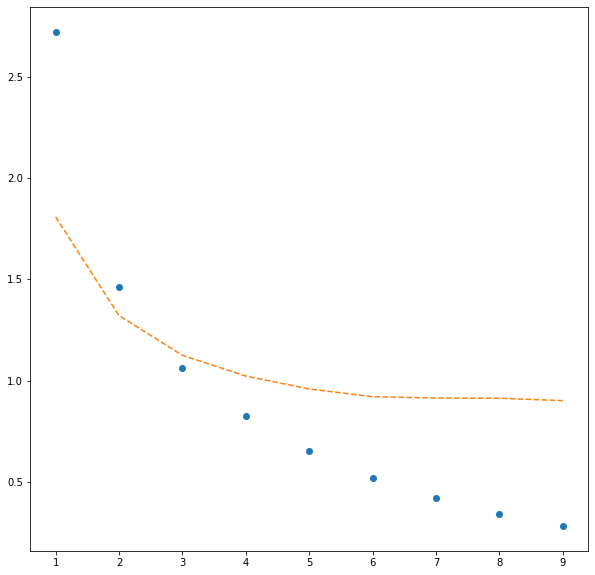

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 55us/step


[0.9916698728834851, 0.7836152911186218]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

array([1.40058205e-06, 1.40384573e-05, 1.19825779e-06, 9.69036162e-01,
       2.71117557e-02, 2.18417904e-06, 1.43820635e-05, 2.50521043e-06,
       4.78513917e-04, 8.16392730e-06, 7.59104660e-06, 1.60818294e-04,
       1.24039730e-06, 8.10691345e-05, 7.33657271e-06, 2.86959439e-05,
       4.78806323e-04, 2.73210062e-05, 5.94920766e-06, 3.55365919e-04,
       1.79019861e-03, 1.41729652e-05, 1.46945706e-06, 4.28032617e-05,
       1.50744581e-05, 2.60766114e-06, 1.79994349e-05, 1.47667788e-06,
       4.12930094e-05, 3.76426324e-05, 2.54762426e-06, 2.02073466e-06,
       7.02984971e-06, 4.92394565e-06, 9.54738334e-06, 1.54302033e-05,
       2.81130979e-05, 1.98937887e-05, 3.34300671e-06, 5.06018405e-05,
       2.21478349e-05, 3.56746204e-05, 9.06572382e-08, 1.79041450e-07,
       3.27178486e-06, 6.00197791e-06], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax([2,5,65,3,6,7])

2

In [ ]:
np.argmax(predictions[0])

3